In [2]:
CLR = {
    'blue': ['#e0f3ff', '#aadeff', '#2bb1ff', '#15587f', '#0b2c40'],
    'gold': ['#fff3dc', '#ffebc7', '#ffddab', '#b59d79', '#5C4938'],
    'red':  ['#ffd8e8', '#ff9db6', '#ff3e72', '#6B404C', '#521424'],
    'gray': ['#eeeeee', '#bbbbbb', '#999999', '#666666', '#333333'],
}

In [23]:
import pathlib

import matplotlib.pyplot as plt
import matplotlib.patches as ppt

In [4]:
d_loop = [(10, 0.9326189901912585), (20, 3.431747987633571), (30, 7.900712997070514), (40, 23.176472008344717), (50, 30.817242004559375), (60, 37.93227899586782), (70, 47.18338800012134), (80, 61.70217400358524), (90, 78.50472899735905), (100, 97.76843499275856), (110, 118.02218899538275), (120, 141.43822199548595), (200, 439.25697400118224), (250, 717.5912509992486)]
d_vectorized = [(10, 1.4458689984166995), (20, 5.35220600431785), (30, 10.920982997049578), (40, 17.124196005170234), (50, 24.84369200828951), (60, 35.458537997328676), (70, 48.63317900162656), (80, 62.86764900141861), (90, 79.89497699600179), (100, 98.36747299414128), (110, 119.616230003885), (120, 141.98320099967532), (200, 388.0320140015101), (250, 581.6465469979448)]
d_lookup = [(10, 0.06900400330778211), (20, 0.11245900532230735), (30, 0.15335599891841412), (40, 0.4065209941472858), (50, 0.37285100552253425), (60, 0.6236290064407513), (70, 0.8157380070770159), (80, 1.0058790066977963), (90, 1.3296270044520497), (100, 1.5350780013250187), (110, 1.9105770043097436), (120, 2.305513000464998), (200, 6.753337002010085), (250, 9.713487001135945), (400, 30.437451001489535), (500, 47.650370994233526), (1000, 191.76472099206876), (2000, 738.4437500004424)]

In [24]:
def fig_before(title: str, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return fig, ax

out_dir = pathlib.Path('opt/')
def fig_after(fig, ax, patches=None, fname=None):
    if patches:
        ax.legend(handles=patches)

    if display:
        plt.show(fig)
    if fname:
        for out_file in [str(out_dir/fname) + s for s in ('.png', '.svg')]:
            print('saving to', out_file)
            fig.savefig(out_file)

    fig.clear()
    plt.close(fig)

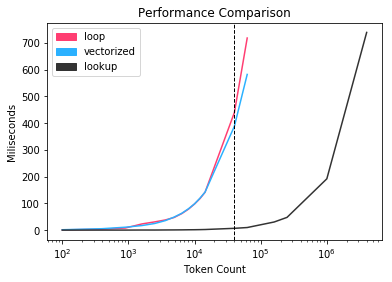

saving to opt/benchmark.png
saving to opt/benchmark.svg


In [25]:
fig, ax = fig_before('Performance Comparison', 'Token Count', 'Miliseconds')

ax.set_xscale('log')

data = (d_loop, d_vectorized, d_lookup)
colors = (CLR['red'][2], CLR['blue'][2], CLR['gray'][4])
names = ('loop', 'vectorized', 'lookup')

patches = []
for d, color, name in zip(data, colors, names):
    x, y = zip(*d)
    ax.plot([q**2 for q in x], y, color=color)
    patches.append(ppt.Patch(color=color, label=name))

ax.axvline(x=200**2, color='black', ls='dashed', lw=1)
fig_after(fig, ax, patches=patches, fname='benchmark')

In [28]:
for ds in data:
    print()
    for k, v in ds:
        print(k, v)


10 0.9326189901912585
20 3.431747987633571
30 7.900712997070514
40 23.176472008344717
50 30.817242004559375
60 37.93227899586782
70 47.18338800012134
80 61.70217400358524
90 78.50472899735905
100 97.76843499275856
110 118.02218899538275
120 141.43822199548595
200 439.25697400118224
250 717.5912509992486

10 1.4458689984166995
20 5.35220600431785
30 10.920982997049578
40 17.124196005170234
50 24.84369200828951
60 35.458537997328676
70 48.63317900162656
80 62.86764900141861
90 79.89497699600179
100 98.36747299414128
110 119.616230003885
120 141.98320099967532
200 388.0320140015101
250 581.6465469979448

10 0.06900400330778211
20 0.11245900532230735
30 0.15335599891841412
40 0.4065209941472858
50 0.37285100552253425
60 0.6236290064407513
70 0.8157380070770159
80 1.0058790066977963
90 1.3296270044520497
100 1.5350780013250187
110 1.9105770043097436
120 2.305513000464998
200 6.753337002010085
250 9.713487001135945
400 30.437451001489535
500 47.650370994233526
1000 191.76472099206876
2000 7